In [149]:
import os
import time
import dill
from typing import List
from functools import reduce
from calendar import monthrange

In [2]:
import json
import csv
import requests
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import urllib.request as urllib2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from random import sample, randint, shuffle
from sklearn.decomposition import PCA

In [4]:
import nltk
import text_summarizer
from gensim.utils import simple_preprocess
from gensim.summarization.summarizer import summarize
from gensim.models import Word2Vec, LsiModel
from gensim.test.utils import common_dictionary, common_corpus

In [5]:
from time import process_time

In [6]:
t = process_time()
dill.load_session('thesis_env2.db')
process_time() - t

-2863.813193

In [7]:
len(politics), len(movies), len(books), len(sports)

(7370, 7370, 7370, 7370)

In [8]:
len(all_)

1685787

In [11]:
# mpol, mmov, mbooks, msports
# summaries_{pol, mov, bks, spts}
# m{pol, mov, bks, spts}_{s, b, c}
# bow_{pol, mov, bks, spts}
# ctrls_{pol, mov, bks, spts}

In [155]:
def heshestats(w1, w2):
    for m in [mpol, mbooks, mmov, msports]:
        c1 = m.wv.vocab[w1].count
        c2 = m.wv.vocab[w2].count
        print(c1, c2, c2/c1)

In [156]:
heshestats('he', 'she')

59791 10012 0.16744995066147078
71587 31500 0.44002402670875995
60185 22859 0.37981224557614024
98658 2479 0.025127207119544283


In [157]:
heshestats('him', 'her')

8938 7827 0.8756992615797717
12895 36723 2.8478480031019777
10990 26108 2.375614194722475
20541 1891 0.09205978287327783


In [158]:
heshestats('man', 'woman')

2431 990 0.4072398190045249
7280 3629 0.498489010989011
6874 3336 0.4853069537387256
2440 191 0.07827868852459016


In [9]:
len(pairs), len(proflist), len(gender_specific)

(52, 205, 218)

In [10]:
vocab = set(mpol.wv.vocab)
for m in [mpol, mmov, mbooks, msports]:
    vocab &= set(m.wv.vocab)
len(vocab)

16581

In [11]:
vocab_all = set(vocab)
for m in [mpol_s, mbks_s, mmov_s, mspts_s] + \
[mpol_b, mbks_b, mmov_b, mspts_b] + \
[mpol_c, mbks_c, mmov_c, mspts_c]:
    vocab_all &= set(m.wv.vocab)
len(vocab_all)

5573

In [12]:
vocab2 = vocab_all

In [13]:
len(vocab), len(vocab2)

(16581, 5573)

In [14]:
grammar = ['a', 'an', 'the', \
           'for', 'and', 'nor', 'but', 'or', 'yet', 'so', \
           'after', 'as', 'before', 'if', 'inasmuch', 'now', \
           'once', 'since', 'supposing', 'though', 'until', \
           'whenever', 'whereas', 'wherever', 'which', \
           'although', 'because', 'even', 'lest', 'both', 'either', \
           'hardly', 'when', 'neither', 'than', 'whether', \
           'consequently', 'finally', 'furthermore', 'hence', \
           'however', 'incidentally', 'indeed', 'instead', 'likewise', \
           'meanwhile', 'about', 'above', 'across', 'after', 'ago', \
           'at', 'below', 'by', 'during', 'for', 'in', \
           'on', 'over', 'past', 'since', 'through', 'to', \
           'up', 'amid', 'atop', 'onto', \
           'throughout', 'upon', 'within', 'without']

In [78]:
with open('grammar.csv', mode='w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(grammar)

In [79]:
with open('grammar.csv') as csv_file:
    grammar = csv_file.read().split(",")

In [64]:
len(adjectives), len(cities), len(grammar)

(393, 2010, 70)

# Projection Bias

Text(0.5, 1.0, 'Explained Variance vs Component Number (Random)')

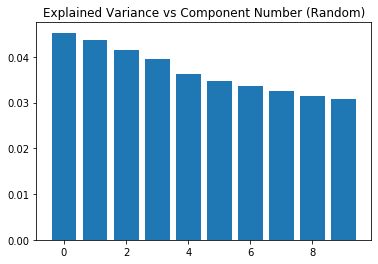

In [165]:
pca_r = PCA(n_components = 10)
pca_r.fit(np.random.rand(70,100))
plt.bar(range(10), pca_r.explained_variance_ratio_)
plt.title("Explained Variance vs Component Number (Random)")

0.34343678


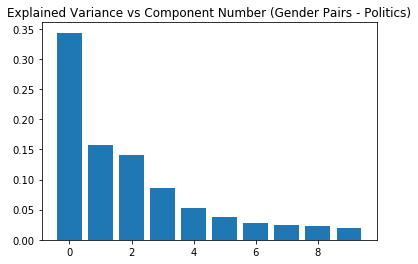

In [20]:
gpol = getg(mpol, "Gender Pairs - Politics", True)

In [21]:
def getg(m):
    matrix = []
    for a, b in pairs:
        if a not in m.wv.vocab or b not in m.wv.vocab:
            continue
        center = (m.wv.get_vector(a) + m.wv.get_vector(b))/2
        matrix.append(m.wv.get_vector(a) - center)
        matrix.append(m.wv.get_vector(b) - center)
    matrix = np.array(matrix)
    p = PCA(n_components = 10)
    p.fit(matrix)
    print(p.explained_variance_ratio_[0])
#         plt.bar(range(10), p.explained_variance_ratio_)
#         plt.title("Explained Variance vs Component Number (" + t + ")")
    return p.components_[0]

In [135]:
def gproj2(g1, g2, m, w1):
    wvec = m.wv.get_vector(w1)
    # g = project wvec onto g1, g2 subspace
    A = np.hstack((g1.reshape(100,1),g2.reshape(100,1)))
    P = A @ np.linalg.inv(A.T @ A) @ A.T
    g = P @ wvec
    p = np.dot(g, wvec)/(np.linalg.norm(g)*np.linalg.norm(wvec))
    return p

In [136]:
gpol_s1, gpol_s2 = getg(mpol_s)
res = sorted([(x, gproj2(gpol_s1, gpol_s2, mpol_s, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(15):
    print(f"{res[i][0].ljust(15)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(15)} {res[-i-1][1]:.2f}")

0.3386617
though          0.00 		 chairman        0.87
proper          0.00 		 democrat        0.85
translate       0.00 		 speaker         0.81
combined        0.01 		 chief           0.79
modernity       0.01 		 james           0.79
fears           0.01 		 lawyer          0.78
moral           0.01 		 jr              0.78
excess          0.01 		 member          0.78
meaningful      0.01 		 leader          0.78
collection      0.01 		 secretary       0.77
sport           0.01 		 representative  0.77
dragging        0.01 		 john            0.76
practices       0.01 		 david           0.76
shifting        0.01 		 congressman     0.75
expenses        0.01 		 deputy          0.75


In [21]:
def gdictadd(models):
    for i in range(len(models)):
        gdict[list(gdict)[i]].append(getg(models[i]))

In [87]:
labels = ["original", "summary (TextRank)", "summary (Centroid-BOW)", "summary (control)"]
gdict = {"politics": [], "books": [], "movies": [], "sports": []}
gdictadd([mpol, mbooks, mmov, msports])
gdictadd([mpol_s, mbks_s, mmov_s, mspts_s])
gdictadd([mpol_b, mbks_b, mmov_b, mspts_b])
gdictadd([mpol_c, mbks_c, mmov_c, mspts_c])

0.34343678
0.5915069
0.52675015
0.35275307
0.31522945
0.78374213
0.62817353
0.49360958
0.31965494
0.8359838
0.7387123
0.51820844
0.32400513
0.768514
0.6437023
0.48822078


In [20]:
def mdictadd(models):
    for i in range(len(models)):
        mdict[list(mdict)[i]].append(models[i])

In [86]:
mdict = {"politics": [], "books": [], "movies": [], "sports": []}
mdictadd([mpol, mbooks, mmov, msports])
mdictadd([mpol_s, mbks_s, mmov_s, mspts_s])
mdictadd([mpol_b, mbks_b, mmov_b, mspts_b])
mdictadd([mpol_c, mbks_c, mmov_c, mspts_c])

In [62]:
def gproj(g, m, w1):
    wvec = m.wv.get_vector(w1)
    p = np.dot(g, wvec)/(np.linalg.norm(g)*np.linalg.norm(wvec))
    return p

In [63]:
def bias(g, m, vocab, wordlist):
    b = 0
    l = list(filter(lambda x: x in vocab, wordlist))
    for x in l:
        b += abs(gproj(g, m, x))
    return b/len(l)

In [ ]:
def bias(g, m, vocab, wordlist):
    b = 0
    l = list(filter(lambda x: x in vocab, wordlist))
    for x in l:
        b += abs(gproj(g, m, x))
    return b/len(l)

In [88]:
print(labels[0])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, proflist), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, adjectives), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, cities), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, grammar), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, gender_specific))

original
  politics 0.099 0.066 0.072 0.054 0.120
     books 0.096 0.069 0.077 0.037 0.155
    movies 0.086 0.092 0.089 0.037 0.173
    sports 0.327 0.175 0.258 0.141 0.372


In [81]:
print(labels[1])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, proflist), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, cities), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, grammar), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, gender_specific))

summary (TextRank)
  politics 0.392 0.111 0.294 0.105 0.269
     books 0.052 0.051 0.044 0.036 0.161
    movies 0.083 0.089 0.064 0.063 0.192
    sports 0.303 0.154 0.182 0.156 0.283


In [82]:
print(labels[2])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, proflist), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, cities), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, grammar), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, gender_specific))

summary (Centroid-BOW)
  politics 0.512 0.152 0.446 0.101 0.405
     books 0.048 0.054 0.046 0.040 0.163
    movies 0.069 0.077 0.067 0.053 0.194
    sports 0.337 0.181 0.209 0.161 0.298


In [83]:
print(labels[3])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, proflist), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, cities), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, grammar), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, gender_specific))

summary (control)
  politics 0.183 0.091 0.143 0.080 0.123
     books 0.046 0.045 0.037 0.046 0.137
    movies 0.066 0.069 0.051 0.052 0.172
    sports 0.246 0.115 0.145 0.115 0.197


In [28]:
gpol = getg(mpol)
res = sorted([(x, gproj(gpol, mpol, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gbooks = getg(mbooks)
res = sorted([(x, gproj(gbooks, mbooks, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gmov = getg(mmov)
res = sorted([(x, gproj(gmov, mmov, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gsports = getg(msports)
res = sorted([(x, gproj(gsports, msports, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

0.34343678
her        -0.50 		 mr         0.43
women      -0.47 		 ouster     0.39
ms         -0.46 		 vladimir   0.37
she        -0.46 		 himself    0.36
feeding    -0.37 		 leader     0.35
disabled   -0.35 		 successor  0.35
herself    -0.35 		 loyalists  0.35
mental     -0.34 		 protégé    0.34
female     -0.34 		 predecessor 0.33
classroom  -0.32 		 hugo       0.33
0.5915069
mr         -0.45 		 her        0.60
baseball   -0.40 		 ms         0.58
himself    -0.40 		 herself    0.57
james      -0.37 		 she        0.51
military   -0.36 		 husband    0.47
john       -0.36 		 girl       0.43
ford       -0.36 		 mary       0.40
game       -0.35 		 women      0.40
al         -0.35 		 baby       0.40
henry      -0.34 		 sex        0.40
0.52675015
steven     -0.52 		 ms         0.63
george     -0.48 		 her        0.52
mr         -0.47 		 marie      0.52
lucas      -0.42 		 nicole     0.51
himself    -0.40 		 herself    0.51
franchise  -0.38 		 actress    0.47
bush       -0.38 		 queen      

In [35]:
gpol_s = getg(mpol_s)
res = sorted([(x, gproj(gpol_s, mpol_s, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gbks_s = getg(mbks_s)
res = sorted([(x, gproj(gbks_s, mbks_s, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gmov_s = getg(mmov_s)
res = sorted([(x, gproj(gmov_s, mmov_s, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gspts_s = getg(mspts_s)
res = sorted([(x, gproj(gspts_s, mspts_s, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

0.31522945
these      -0.52 		 chairman   0.80
large      -0.44 		 secretary  0.78
low        -0.43 		 chief      0.77
without    -0.42 		 deputy     0.75
their      -0.40 		 leader     0.73
different  -0.40 		 paul       0.67
small      -0.39 		 president  0.67
making     -0.36 		 king       0.66
pay        -0.36 		 director   0.66
such       -0.36 		 general    0.66
0.78374213
mr         -0.38 		 her        0.63
he         -0.32 		 she        0.47
his        -0.30 		 herself    0.46
administration -0.28 		 husband    0.42
iraq       -0.27 		 baby       0.37
president  -0.26 		 girl       0.35
military   -0.26 		 children   0.31
bush       -0.26 		 mother     0.30
nations    -0.26 		 sister     0.30
history    -0.24 		 love       0.29
0.62817353
her        -0.57 		 disney     0.41
herself    -0.47 		 pictures   0.38
she        -0.44 		 production 0.35
husband    -0.41 		 studio     0.34
mother     -0.39 		 mr         0.34
ms         -0.38 		 producers  0.34
girl       -0.38 		 enterta

In [36]:
gpol_b = getg(mpol_b)
res = sorted([(x, gproj(gpol_b, mpol_b, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gbks_b = getg(mbks_b)
res = sorted([(x, gproj(gbks_b, mbks_b, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gmov_b = getg(mmov_b)
res = sorted([(x, gproj(gmov_b, mmov_b, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gspts_b = getg(mspts_b)
res = sorted([(x, gproj(gspts_b, mspts_b, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

0.31965494
these      -0.48 		 chairman   0.92
without    -0.41 		 democrat   0.87
their      -0.41 		 james      0.84
prices     -0.38 		 lawyer     0.83
real       -0.36 		 representative 0.83
weapons    -0.35 		 jr         0.82
large      -0.35 		 peter      0.81
oil        -0.35 		 secretary  0.81
further    -0.33 		 john       0.81
enough     -0.33 		 joseph     0.80
0.8359838
her        -0.63 		 mr         0.44
she        -0.50 		 his        0.41
husband    -0.44 		 he         0.37
herself    -0.41 		 bush       0.33
girl       -0.30 		 administration 0.31
woman      -0.29 		 himself    0.29
ms         -0.29 		 president  0.24
baby       -0.28 		 nations    0.23
children   -0.28 		 states     0.23
mother     -0.27 		 clinton    0.21
0.7387123
her        -0.60 		 mr         0.43
she        -0.51 		 disney     0.34
herself    -0.48 		 his        0.32
girl       -0.44 		 studio     0.28
husband    -0.41 		 rights     0.28
woman      -0.41 		 company    0.28
mother     -0.35 		 major

In [37]:
gpol_c = getg(mpol_c)
res = sorted([(x, gproj(gpol_c, mpol_c, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gbks_c = getg(mbks_c)
res = sorted([(x, gproj(gbks_c, mbks_c, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gmov_c = getg(mmov_c)
res = sorted([(x, gproj(gmov_c, mmov_c, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")
gspts_c = getg(mspts_c)
res = sorted([(x, gproj(gspts_c, mspts_c, x)) for x in filter(lambda x: x in vocab2, vocab2)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

0.32400513
mail       -0.37 		 head       0.52
or         -0.35 		 chairman   0.51
high       -0.35 		 union      0.51
got        -0.33 		 president  0.50
few        -0.32 		 leadership 0.48
com        -0.32 		 secretary  0.48
young      -0.31 		 chief      0.47
children   -0.31 		 powers     0.47
isn        -0.29 		 coalition  0.47
these      -0.28 		 leader     0.47
0.768514
her        -0.61 		 mr         0.38
herself    -0.46 		 his        0.31
she        -0.46 		 war        0.29
husband    -0.41 		 he         0.28
children   -0.30 		 bush       0.27
love       -0.28 		 civil      0.24
ms         -0.27 		 administration 0.23
mother     -0.27 		 ii         0.23
girl       -0.27 		 iraq       0.22
woman      -0.27 		 policy     0.20
0.6437023
disney     -0.38 		 her        0.55
mr         -0.37 		 she        0.47
major      -0.34 		 herself    0.41
studio     -0.34 		 husband    0.41
company    -0.33 		 girl       0.40
entertainment -0.33 		 woman      0.35
distribution -0.33 		 mothe

In [85]:
sorted(grammar)[:15]

['a',
 'about',
 'above',
 'across',
 'after',
 'after',
 'ago',
 'although',
 'amid',
 'an',
 'and',
 'as',
 'at',
 'atop',
 'because']

## Plot PCA

In [38]:
# plot top 5 pos and top 5 neg and top 10 professions

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
matrix = []
for x in vocab:
    matrix.append(mpol.wv.get_vector(x))
matrix = np.array(matrix)

In [91]:
scaler.fit_transform(matrix)
p = PCA(n_components = 10)
p.fit(matrix)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
def proj(a, b):
    p = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return p

In [102]:
def getgs(m):
    matrix = []
    for a, b in pairs:
        if a not in m.wv.vocab or b not in m.wv.vocab:
            continue
        center = (m.wv.get_vector(a) + m.wv.get_vector(b))/2
        matrix.append(m.wv.get_vector(a) - center)
        matrix.append(m.wv.get_vector(b) - center)
    matrix = np.array(matrix)
    p = PCA(n_components = 10)
    p.fit(matrix)
    print(p.explained_variance_ratio_[0])
#         plt.bar(range(10), p.explained_variance_ratio_)
#         plt.title("Explained Variance vs Component Number (" + t + ")")
    return p.components_[0], p.components_[1]

In [ ]:
# p.components_[0]
words = ['her', 'him', 'mr', 'ms', 'father', 'mother', 'president', 'captain', 'professor', 'teacher', \
         'nurse', 'family', 'man', 'woman']
gpol1, gpol2 = getgs(mpol)
xs = [gproj(gpol1, mpol, x) for x in words]
ys = [gproj(gpol2, mpol, x) for x in words]
plt.plot(xs, ys, 'o')
# label points
for x,y,z in zip(xs,ys,words):
    plt.annotate(z, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-1,1,.25))
plt.yticks(np.arange(-1,1,.25))
plt.show()

## Regression for bias testing

In [30]:
def regress(g1, m1, g2, m2, wordlist):
    x = np.array([gproj(g1, m1, w) for w in wordlist if w in m1.wv.vocab and w in m2.wv.vocab])
    y = np.array([gproj(g2, m2, w) for w in wordlist if w in m1.wv.vocab and w in m2.wv.vocab])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return slope, p_value

In [32]:
regress(gpol, mpol, getg(mpol_s), mpol_s, proflist)

0.31522945


(0.7564479357792341, 1.1464826034410933e-07)

## Isolate gender subspace in sports

In [23]:
gsports = getg(msports)

0.35275307


In [144]:
male = ['male', 'man', 'boy', 'boys', 'brother', 'brothers', 'he', 'him', 'son', 'sons', 'father', \
        'brothers', 'king', 'grandfather', 'uncle', 'himself', 'men', 'mr']

In [145]:
female = ["female", "woman", "girl", "girls", "sister", 'sisters', "she", "her", "daughter", 'daughters', \
          "mother", 'sisters', 'queen', 'grandmother', 'herself', 'women', 'ms', 'mrs']

In [146]:
shuffled = male + female
shuffle(shuffled)

In [138]:
def valid(g, m):
    normal = abs(np.mean([gproj(g, m, w) for w in male]) - np.mean([gproj(g, m, w) for w in female]))
    shuffleds = []
    for i in range(100):
        shuffled = male + female
        shuffle(shuffled)
        shuffleds.append(shuffled)
    randomized = np.mean([abs(np.mean([gproj(g, m, w) for w in shuffled[:len(male)]]) \
                     - np.mean([gproj(g, m, w) for w in shuffled[len(male):]])) for shuffled in shuffleds])
    return normal, randomized, normal-randomized

In [147]:
print(labels[0])
for i in mdict:
    print("%10s" % i, valid(gdict[i][0], mdict[i][0]))
print(labels[1])
for i in mdict:
    print("%10s" % i, valid(gdict[i][1], mdict[i][1]))
print(labels[2])
for i in mdict:
    print("%10s" % i, valid(gdict[i][2], mdict[i][2]))
print(labels[3])
for i in mdict:
    print("%10s" % i, valid(gdict[i][3], mdict[i][3]))

original
  politics (0.3614776, 0.07001065, 0.29146695)
     books (0.5090663, 0.07400261, 0.43506366)
    movies (0.43309006, 0.0691234, 0.36396664)
    sports (0.23272392, 0.054675065, 0.17804885)
summary (TextRank)
  politics (0.13173553, 0.05106164, 0.08067389)
     books (0.25557855, 0.057970315, 0.19760823)
    movies (0.28411356, 0.057401396, 0.22671217)
    sports (0.08959454, 0.0538422, 0.03575234)
summary (Centroid-BOW)
  politics (0.01823011, 0.041701775, -0.023471665)
     books (0.2816375, 0.055586576, 0.22605091)
    movies (0.29447743, 0.05446414, 0.2400133)
    sports (0.100510105, 0.05935163, 0.041158475)
summary (control)
  politics (0.15456088, 0.04477932, 0.10978156)
     books (0.22588947, 0.054747853, 0.17114162)
    movies (0.23845969, 0.055831954, 0.18262774)
    sports (0.0883499, 0.04771875, 0.040631153)


In [113]:
valid(gpol, mpol)

(0.3600691, 0.05375815, 0.30631095)

In [91]:
valid(getg(mmov), mmov)

0.52675015


(0.5124208, 0.067001104, 0.44541967)

In [92]:
valid(gsports, msports)

(0.24234134, 0.054676324, 0.18766502)

In [94]:
valid(getg(mmov_s), mmov_s)

0.62817353


(0.2701499, 0.09716387, 0.17298602)

In [24]:
res = sorted([(x, gproj(gsports, msports, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

fielding   -0.48 		 ms         0.66
consistently -0.44 		 mrs        0.65
solid      -0.43 		 husband    0.64
shaky      -0.40 		 sang       0.62
switch     -0.40 		 house      0.58
hitting    -0.39 		 local      0.58
throwing   -0.38 		 store      0.58
hernández  -0.38 		 sister     0.57
crucial    -0.38 		 ann        0.56
starting   -0.37 		 songs      0.56


In [25]:
heshe = msports.wv.get_vector('he') - msports.wv.get_vector('she')

In [26]:
res = sorted([(x, gproj(heshe, msports, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(10):
    print(f"{res[i][0].ljust(10)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(10)} {res[-i-1][1]:.2f}")

ms         -0.60 		 switch     0.45
sang       -0.60 		 fielding   0.45
mrs        -0.60 		 he         0.43
husband    -0.58 		 starting   0.42
song       -0.54 		 solid      0.42
songs      -0.54 		 position   0.41
herself    -0.54 		 consistently 0.41
deaf       -0.54 		 hitting    0.40
candy      -0.53 		 return     0.39
oxford     -0.53 		 perez      0.39


In [ ]:
w = mpol.wv.get_vector('politician') + mpol.wv.get_vector('female')
mpol.most_similar(positive=[w], topn=15)